# Imports

In [1]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.preprocessing.image import load_img, img_to_array
from keras.layers.convolutional import *
from keras.layers.pooling import *
from keras import backend as K

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation,Dense, Flatten
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
from PIL import Image

import numpy as np
import pandas as pd
import os

In [2]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg19.summary()

2022-03-22 14:51:20.399026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-22 14:51:20.489462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-22 14:51:20.490197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-22 14:51:20.491378: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [3]:
vgg19_short = Model(vgg19.input, vgg19.layers[-2].output) # removing last max-pool

for i in range(21):
    vgg19_short.layers[i].trainable = False

In [4]:
K.clear_session()
my_model = Sequential(
    [
        vgg19_short,
        Flatten(),
        Dense(units=2, activation='softmax')
    ]
)

my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 14, 14, 512)       20024384  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 200706    
Total params: 20,225,090
Trainable params: 200,706
Non-trainable params: 20,024,384
_________________________________________________________________


In [5]:
Encode = {
    'cats': 0,
    'dogs': 1
}
def Data_Loading(base_path):
    XList, YList = [], []

    for directory in os.listdir(base_path): # directory = cats | dogs
        for imageName in os.listdir(base_path + '/' + directory): # fileName.jpg | other
            try:
                XList.append(np.array(Image.open(base_path + '/' + directory + '/' + imageName).resize((224,224), Image.ANTIALIAS)))
                YList.append(Encode[directory])
            except:
                pass
        print(directory+"'s Image Loaded")

    X = np.array(XList)
    Y = np.array(YList)
    return X,Y

In [6]:
train_folder = '/kaggle/input/cat-and-dog/training_set/training_set'
test_folder = '/kaggle/input/cat-and-dog/test_set/test_set'

X_train,Y_train = Data_Loading(train_folder)
print(X_train.shape)
print(Y_train.shape)

X_test,Y_test = Data_Loading(test_folder)
print(X_test.shape)
print(Y_test.shape)

dogs's Image Loaded
cats's Image Loaded
(8005, 224, 224, 3)
(8005,)
dogs's Image Loaded
cats's Image Loaded
(2023, 224, 224, 3)
(2023,)


In [7]:
my_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = my_model.fit(x=X_train, y=Y_train, batch_size=256, validation_data=(X_test,Y_test), epochs=7,shuffle=True, verbose=1)

2022-03-22 14:53:11.134430: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1204976640 exceeds 10% of free system memory.
2022-03-22 14:53:12.344572: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1204976640 exceeds 10% of free system memory.
2022-03-22 14:53:13.222334: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7


2022-03-22 14:53:14.559556: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


32/32 [==============================] - 65s 1s/step - loss: 1.3964 - accuracy: 0.8828 - val_loss: 0.5711 - val_accuracy: 0.9575
Epoch 2/7
32/32 [==============================] - 20s 627ms/step - loss: 0.1418 - accuracy: 0.9808 - val_loss: 0.5095 - val_accuracy: 0.9639
Epoch 3/7
32/32 [==============================] - 20s 630ms/step - loss: 0.0176 - accuracy: 0.9960 - val_loss: 0.5051 - val_accuracy: 0.9659
Epoch 4/7
32/32 [==============================] - 20s 629ms/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 0.5117 - val_accuracy: 0.9619
Epoch 5/7
32/32 [==============================] - 20s 630ms/step - loss: 9.6916e-04 - accuracy: 0.9999 - val_loss: 0.5080 - val_accuracy: 0.9624
Epoch 6/7
32/32 [==============================] - 20s 632ms/step - loss: 1.1949e-04 - accuracy: 1.0000 - val_loss: 0.5056 - val_accuracy: 0.9624
Epoch 7/7
32/32 [==============================] - 20s 630ms/step - loss: 6.2949e-05 - accuracy: 1.0000 - val_loss: 0.5056 - val_accuracy: 0.9624


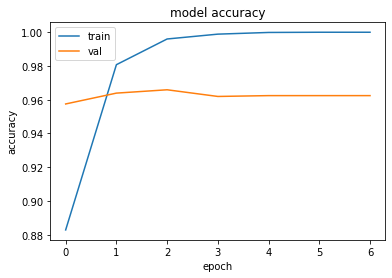

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()